In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('titanic_train').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/06/12 00:06:22 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
filepath = '/home/ubuntu/working/spark-examples/data/titanic_train.csv'
titanic_sdf = spark.read.csv(filepath, inferSchema=True, header=True)

titanic_sdf.show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|
+-----------+--------+------+--------------------+------+----+-----+-----+------

In [4]:
# 스파크 데이터프레임에서 판다스 데이터프레임으로 바꾸기
titanic_pdf = titanic_sdf.select('*').toPandas()
titanic_pdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S


# orderBy
- 한 개 이상의 컬럼을 기준으로 정렬하는 기능
- Transformation 작업

In [9]:
# Pandas DataFrame 정렬하기

# name 컬럼 기준 오름차순 정렬
titanic_pdf_sorted_1 = titanic_pdf.sort_values(by='Name',ascending=True)
titanic_pdf_sorted_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
146,147,1,3,"""Andersson, Mr. August Edvard (""""Wennerstrom"""")""",male,27.0,0,0,350043,7.7958,None,S
518,519,1,2,"""Angle, Mrs. William A (Florence """"Mary"""" Agne...",female,36.0,1,0,226875,26.0000,None,S
290,291,1,1,"""Barber, Miss. Ellen """"Nellie""""""",female,26.0,0,0,19877,78.8500,None,S
624,625,0,3,"""Bowen, Mr. David John """"Dai""""""",male,21.0,0,0,54636,16.1000,None,S
507,508,1,1,"""Bradley, Mr. George (""""George Arthur Brayton"""")""",male,NaN,0,0,111427,26.5500,None,S
...,...,...,...,...,...,...,...,...,...,...,...,...
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.5000,None,S
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5000,None,S
361,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,None,C
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,None,S


In [15]:
# Name컬럼 오름차순, Age 내림차순
titanic_pdf_sorted_2 = titanic_pdf.sort_values(by=['Name','Age'], ascending=[True, False])
titanic_pdf_sorted_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
146,147,1,3,"""Andersson, Mr. August Edvard (""""Wennerstrom"""")""",male,27.0,0,0,350043,7.7958,None,S
518,519,1,2,"""Angle, Mrs. William A (Florence """"Mary"""" Agne...",female,36.0,1,0,226875,26.0000,None,S
290,291,1,1,"""Barber, Miss. Ellen """"Nellie""""""",female,26.0,0,0,19877,78.8500,None,S
624,625,0,3,"""Bowen, Mr. David John """"Dai""""""",male,21.0,0,0,54636,16.1000,None,S
507,508,1,1,"""Bradley, Mr. George (""""George Arthur Brayton"""")""",male,NaN,0,0,111427,26.5500,None,S
...,...,...,...,...,...,...,...,...,...,...,...,...
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.5000,None,S
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5000,None,S
361,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,None,C
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,None,S


In [19]:
# 스파크 데이터프레임 정렬하기
from pyspark.sql.functions import col

# titanic_sdf.orderBy('Pclass',ascending=False) # 여기까지만 쓰면 RDD
titanic_sdf.orderBy(col('Pclass'),ascending=False).show()


+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|         25|       0|     3|Palsson, Miss. To...|female| 8.0|    3|    1|          349909| 21.075| null|       S|
|         47|       0|     3|   Lennon, Mr. Denis|  male|null|    1|    0|          370371|   15.5| null|       Q|
|         26|       1|     3|Asplund, Mrs. Car...|female|38.0|    1|    5|          347077|31.3875| null|       S|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|         27|       0|     3|Emir, Mr. Farred ...|  male|null|    0|    0|            2631|  7.225| null|       C|
|          6|       0|     3|    Moran, Mr. James|  male|null|    0|    0|      

In [28]:
# 여러개의 컬럼을 지정하기
# Pclass, Age로 정렬하기
titanic_sdf.orderBy([col('Pclass'),col('Age')],ascending=False).show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+------+------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|Ticket|  Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+------+------+-----+--------+
|        852|       0|     3| Svensson, Mr. Johan|  male|74.0|    0|    0|347060| 7.775| null|       S|
|        117|       0|     3|Connors, Mr. Patrick|  male|70.5|    0|    0|370369|  7.75| null|       Q|
|        281|       0|     3|    Duane, Mr. Frank|  male|65.0|    0|    0|336439|  7.75| null|       Q|
|        484|       1|     3|Turkula, Mrs. (He...|female|63.0|    0|    0|  4134|9.5875| null|       S|
|        327|       0|     3|Nysveen, Mr. Joha...|  male|61.0|    0|    0|345364|6.2375| null|       S|
+-----------+--------+------+--------------------+------+----+-----+-----+------+------+-----+--------+
only showing top 5 rows



In [26]:
# Pclass 오름차순, Age 내림차순
titanic_sdf.orderBy([col('Pclass'),col('Age')], ascending=[True,False]).show(5)

+-----------+--------+------+--------------------+----+----+-----+-----+---------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name| Sex| Age|SibSp|Parch|   Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+----+----+-----+-----+---------+-------+-----+--------+
|        631|       1|     1|Barkworth, Mr. Al...|male|80.0|    0|    0|    27042|   30.0|  A23|       S|
|         97|       0|     1|Goldschmidt, Mr. ...|male|71.0|    0|    0| PC 17754|34.6542|   A5|       C|
|        494|       0|     1|Artagaveytia, Mr....|male|71.0|    0|    0| PC 17609|49.5042| null|       C|
|        746|       0|     1|Crosby, Capt. Edw...|male|70.0|    1|    1|WE/P 5735|   71.0|  B22|       S|
|        457|       0|     1|Millet, Mr. Franc...|male|65.0|    0|    0|    13509|  26.55|  E38|       S|
+-----------+--------+------+--------------------+----+----+-----+-----+---------+-------+-----+--------+
only showing top 5 rows



In [29]:
# orderBy와 동일한 메소드인 sort 사용하기
titanic_sdf.sort(col('Pclass').asc(), col('Age').desc()).show()

+-----------+--------+------+--------------------+------+----+-----+-----+---------+--------+-----------+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|   Ticket|    Fare|      Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+---------+--------+-----------+--------+
|        631|       1|     1|Barkworth, Mr. Al...|  male|80.0|    0|    0|    27042|    30.0|        A23|       S|
|        494|       0|     1|Artagaveytia, Mr....|  male|71.0|    0|    0| PC 17609| 49.5042|       null|       C|
|         97|       0|     1|Goldschmidt, Mr. ...|  male|71.0|    0|    0| PC 17754| 34.6542|         A5|       C|
|        746|       0|     1|Crosby, Capt. Edw...|  male|70.0|    1|    1|WE/P 5735|    71.0|        B22|       S|
|         55|       0|     1|Ostby, Mr. Engelh...|  male|65.0|    0|    1|   113509| 61.9792|        B30|       C|
|        457|       0|     1|Millet, Mr. Franc...|  male|65.0|    0|    0|    13

- 문제1
```sql
select Pclass, Name
from titanic_sdf
order by Pclass asc, Name desc
```

In [44]:
titanic_sdf.select(col('Pclass'),col('Name')).orderBy(col('Pclass').asc(), col('Name').desc()).show(5)

+------+--------------------+
|Pclass|                Name|
+------+--------------------+
|     1|Young, Miss. Mari...|
|     1|  Wright, Mr. George|
|     1|   Woolner, Mr. Hugh|
|     1|Williams-Lambert,...|
|     1|Williams, Mr. Cha...|
+------+--------------------+
only showing top 5 rows



- 문제2
```sql
select Pclass, Name
from (select * 
      from titanic_sdf
      order by Pclass asc, Name desc)
      
```

In [45]:
titanic_sdf_test = titanic_sdf.sort([col('Pclass').asc(), col('Name').desc()]).select(col('Pclass'),col('Name'))
titanic_sdf_test.show(5)

+------+--------------------+
|Pclass|                Name|
+------+--------------------+
|     1|Young, Miss. Mari...|
|     1|  Wright, Mr. George|
|     1|   Woolner, Mr. Hugh|
|     1|Williams-Lambert,...|
|     1|Williams, Mr. Cha...|
+------+--------------------+
only showing top 5 rows



# Agg
- Spark DataFrame은 DataFrame 객체에서 aggregation 메소드가 별로 없다.
- Aggregation 메소드 적용 시에는 `pyspark.sql.functions` 에 있는 `min, max, sum` 등의 함수를 사용하자
- agg는 조금 더 간단한 연산을 할 때 ( count, minmax, )
- groupby 는 조금 더 고차원적인 집계

In [49]:
titanic_pdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,None,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"""Johnston, Miss. Catherine Helen """"Carrie""""""",female,NaN,1,2,W./C. 6607,23.4500,None,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [53]:
# 판다스 데이터프레임의 Aggregation
print('count :', titanic_pdf.count())
# print('max :', titanic_pdf.max())
print('-----------------------------------------------')
print('type(count): ', type(titanic_pdf.count()))

count : PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64
-----------------------------------------------
type(count):  <class 'pandas.core.series.Series'>


In [55]:
titanic_pdf[['Pclass','Age']].max()

Pclass     3.0
Age       80.0
dtype: float64

In [57]:
# spark DataFrame에서 count() 사용하기.
titanic_sdf.count() # spark dataFrame의 count() = 데이터 행의 개수

891

In [67]:
titanic_sdf.max() 

AttributeError: 'DataFrame' object has no attribute 'max'

In [68]:
from pyspark.sql.functions import max, min, sum

titanic_sdf_max = titanic_sdf.select(max('Age')) # = select max(age) from titanic_sdf 
titanic_sdf_max.show()

+--------+
|max(Age)|
+--------+
|    80.0|
+--------+



# groupBy

In [83]:
# Pandas DataFrame의 groupBy
titanic_pdf_groupby = titanic_pdf.groupby(by='Pclass').count()
titanic_pdf_groupby['Age']

Pclass
1    186
2    173
3    355
Name: Age, dtype: int64

In [85]:
# 특정 컬럼에 특정 집계 연산 수행하기: agg

agg_format = {'Age':'max',
             'SibSp':'sum',
             'Fare':'mean'}

titanic_pdf_groupby.agg(agg_format)

Age      355.0
SibSp    891.0
Fare     297.0
dtype: float64

In [87]:
# value_counts()를 시리즈에 적용 시 해당 시리즈 내의 값 별로 건수(count)를 구한다.
titanic_pdf['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [90]:
# Spark Dataframe의 groupBy = pandas의 value_counts와 동일
titanic_sdf.groupBy('Pclass').count().show() # select pclass, count(*) from titanic_sdf group by pclass

+------+-----+
|Pclass|count|
+------+-----+
|     1|  216|
|     3|  491|
|     2|  184|
+------+-----+



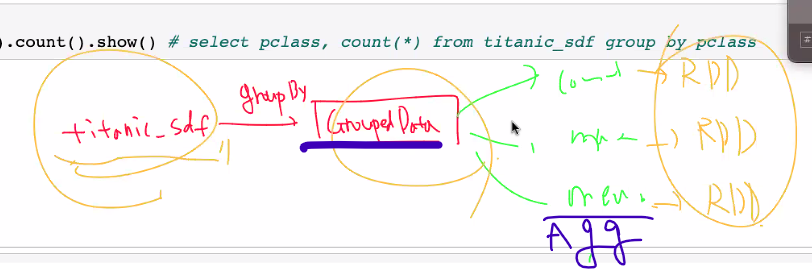


In [91]:
type(titanic_sdf.groupBy('Pclass'))

pyspark.sql.group.GroupedData

In [92]:
titanic_sdf.groupBy('Pclass').count().orderBy('count',ascending=False).show()

+------+-----+
|Pclass|count|
+------+-----+
|     3|  491|
|     1|  216|
|     2|  184|
+------+-----+



In [93]:
# count()가 아닌 다른 aggregation 메소드를 사용하면 pandas dataframe의 groupby와 유사하게 컬럼 레벨로 전체 집계
# spark의 count()는 row level이 중요.
# pandas -> column 중심

titanic_sdf.groupBy('Pclass').max().show()

+------+----------------+-------------+-----------+--------+----------+----------+---------+
|Pclass|max(PassengerId)|max(Survived)|max(Pclass)|max(Age)|max(SibSp)|max(Parch)|max(Fare)|
+------+----------------+-------------+-----------+--------+----------+----------+---------+
|     1|             890|            1|          1|    80.0|         3|         4| 512.3292|
|     3|             891|            1|          3|    74.0|         8|         6|    69.55|
|     2|             887|            1|          2|    70.0|         3|         3|     73.5|
+------+----------------+-------------+-----------+--------+----------+----------+---------+



In [95]:
# groupby 를 이용해서 특정 컬럼에 aggregation을 적용.
# max('컬럼명')과 같이 사용하면 됨.

titanic_sdf.groupby('Pclass').max('Age').show()

+------+--------+
|Pclass|max(Age)|
+------+--------+
|     1|    80.0|
|     3|    74.0|
|     2|    70.0|
+------+--------+



In [96]:
titanic_sdf.groupby('Pclass').max(col('Age')).show() # 집계함수 안에 col쓰면 오류남

TypeError: Column is not iterable

In [97]:
titanic_sdf.groupBy(['Pclass','Embarked']).max('Age').show()

+------+--------+--------+
|Pclass|Embarked|max(Age)|
+------+--------+--------+
|     3|       C|    45.5|
|     2|       C|    36.0|
|     1|    null|    62.0|
|     1|       Q|    44.0|
|     3|       Q|    70.5|
|     2|       Q|    57.0|
|     1|       C|    71.0|
|     1|       S|    80.0|
|     3|       S|    74.0|
|     2|       S|    70.0|
+------+--------+--------+



In [100]:
from pyspark.sql.functions import avg, sum, max, min

# select max(age), min(age), sum(age), avg(age) from titanic_sdf group by pclass
titanic_sdf.groupBy('Pclass').agg(
    max('Age').alias('age_max'),
    min('Age'),
    sum('Age'),
    avg('Age')
).show()

+------+-------+--------+--------+------------------+
|Pclass|age_max|min(Age)|sum(Age)|          avg(Age)|
+------+-------+--------+--------+------------------+
|     1|   80.0|    0.92| 7111.42|38.233440860215055|
|     3|   74.0|    0.42| 8924.92| 25.14061971830986|
|     2|   70.0|    0.67| 5168.83| 29.87763005780347|
+------+-------+--------+--------+------------------+



In [101]:
# agg 쓸 때는 col 사용가능....(?_?)
# 기냥 max, min 이런 것만 쓸 때는 col 사용 불가
titanic_sdf.groupBy('Pclass').agg(
    max(col('Age')).alias('age_max'),
    min('Age'),
    sum('Age'),
    avg('Age')
).show()

+------+-------+--------+--------+------------------+
|Pclass|age_max|min(Age)|sum(Age)|          avg(Age)|
+------+-------+--------+--------+------------------+
|     1|   80.0|    0.92| 7111.42|38.233440860215055|
|     3|   74.0|    0.42| 8924.92| 25.14061971830986|
|     2|   70.0|    0.67| 5168.83| 29.87763005780347|
+------+-------+--------+--------+------------------+



- 문제
```sql
select max(age) as max_age,
        min(age) as min_age,
        sum(age) as sum_age,
        avg(age) as avg_age
from titanic_sdf
group by pclass having max(age) > 70
```

또는

```sql
select max_age, min_age, sum_age, avg_age
from (select max(age) as max_age,
        min(age) as min_age,
        sum(age) as sum_age,
        avg(age) as avg_age
      from titanic_sdf
      group by pclass)
where max_age > 70
```

In [109]:
titanic_sdf.groupBy(['Pclass']).agg(
                max('Age').alias('max_age'),
                min('Age').alias('min_age'),
                sum('Age').alias('sum_age'),
                avg('Age').alias('avg_age')).filter(col('max_age')>70).show()

+------+-------+-------+-------+------------------+
|Pclass|max_age|min_age|sum_age|           avg_age|
+------+-------+-------+-------+------------------+
|     1|   80.0|   0.92|7111.42|38.233440860215055|
|     3|   74.0|   0.42|8924.92| 25.14061971830986|
+------+-------+-------+-------+------------------+



In [110]:
spark.stop()